# Tweets que contienen links, hashtag o menciones
En el análisis general se descubrió que los tweets que tienen hipervínculos a webs externas, hashtags o menciones impactan sobre el valor medio de la columna target.\
En esta sección se analiza más en profundidad los tweets que contienen links, hashtags o menciones.

In [71]:
import pandas as pd

In [72]:
# Replico la estructura de los tweets.
tweets = spotify_songs = pd.read_csv('Data/train.csv')
tweets['length'] = tweets['text'].str.len()
tweets['located'] = tweets['location'].notnull().astype(int)
tweets['location_length'] = tweets['location'].str.len()
tweets['location_length'].fillna(0, inplace=True)
tweets['has_keyword'] = tweets['keyword'].notnull().astype(int)
tweets['keyword_length'] = tweets['keyword'].str.len()
tweets['keyword_length'].fillna(0, inplace=True)
tweets['tweet_length'] = tweets['length'] + tweets['location_length'] + tweets['keyword_length']

In [73]:
tweets.head()

,id,keyword,location,text,target,length,located,location_length,has_keyword,keyword_length,tweet_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,0,0.0,0,0.0,69.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,0,0.0,0,0.0,38.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,0,0.0,0,0.0,133.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,0,0.0,0,0.0,65.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,0,0.0,0,0.0,88.0


In [74]:
tweets.count()

id                 7613
keyword            7552
location           5080
text               7613
target             7613
length             7613
located            7613
location_length    7613
has_keyword        7613
keyword_length     7613
tweet_length       7613
dtype: int64

In [75]:
tweets_links = tweets[tweets['text'].str.contains('http')]
tweets_links.count()

id                 3971
keyword            3951
location           2716
text               3971
target             3971
length             3971
located            3971
location_length    3971
has_keyword        3971
keyword_length     3971
tweet_length       3971
dtype: int64

In [77]:
tweets_links.head(10)

,id,keyword,location,text,target,length,located,location_length,has_keyword,keyword_length,tweet_length
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,1,10.0,1,6.0,71.0
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,1,29.0,1,6.0,102.0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,1,6.0,1,6.0,94.0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,1,10.0,1,6.0,92.0
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,55,1,12.0,1,6.0,73.0
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1,140,0,0.0,1,6.0,146.0
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,114,1,14.0,1,6.0,134.0
44,64,ablaze,NaN,I wanted to set Chicago ablaze with my preachi...,0,92,0,0.0,1,6.0,98.0
45,65,ablaze,NaN,I gained 3 followers in the last week. You? Kn...,0,96,0,0.0,1,6.0,102.0
46,66,ablaze,"GREENSBORO,NORTH CAROLINA",How the West was burned: Thousands of wildfire...,1,97,1,25.0,1,6.0,128.0


In [78]:
tweets_hashtag = tweets[tweets['text'].str.contains('#.*?(?=\s|$)')]
tweets_hashtag.count()

id                 1761
keyword            1740
location           1238
text               1761
target             1761
length             1761
located            1761
location_length    1761
has_keyword        1761
keyword_length     1761
tweet_length       1761
dtype: int64

In [80]:
tweets_hashtag.head()

,id,keyword,location,text,target,length,located,location_length,has_keyword,keyword_length,tweet_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,0,0.0,0,0.0,69.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,0,0.0,0,0.0,65.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,0,0.0,0,0.0,88.0
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110,0,0.0,0,0.0,110.0
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95,0,0.0,0,0.0,95.0


In [81]:
tweets_mentions = tweets[tweets['text'].str.contains('@.*?(?=\s|$)')]
tweets_mentions.count()

id                 2039
keyword            2037
location           1451
text               2039
target             2039
length             2039
located            2039
location_length    2039
has_keyword        2039
keyword_length     2039
tweet_length       2039
dtype: int64

In [82]:
tweets_mentions.head()

,id,keyword,location,text,target,length,located,location_length,has_keyword,keyword_length,tweet_length
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,1,10.0,1,6.0,71.0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,122,1,8.0,1,6.0,136.0
43,63,ablaze,NaN,SOOOO PUMPED FOR ABLAZE ???? @southridgelife,0,44,0,0.0,1,6.0,50.0
54,78,ablaze,Abuja,Noches El-Bestia '@Alexis_Sanchez: happy to se...,0,130,1,5.0,1,6.0,141.0
57,81,ablaze,"Sao Paulo, Brazil",Set our hearts ablaze and every city was a gif...,0,124,1,17.0,1,6.0,147.0


## Influencia de los tweets con links, hashtags y menciones sobre el valor del target
Se analiza la influencia de tener un link, un hashtag o una mención en el texto del tweet sobre el valor del target.\
Se realizan gráficos que indiquen la cantidad de tweets verdaderos y falsos para el conjunto de tweets en general y luego para el conjunto de tweets que contienen links, hashtags o menciones:

In [32]:
# Tweet en general.
true_tweets = tweets['target'].sum()
false_tweets = tweets['target'].count() - true_tweets
print(tweets['target'].count())
print(true_tweets)
print(false_tweets)

7613
3271
4342


In [84]:
# Tweets con links.
true_link_tweets = tweets_links['target'].sum()
false_link_tweets = tweets_links['target'].count() - true_link_tweets
print(tweets_links['target'].count())
print(true_link_tweets)
print(false_link_tweets)

3971
2172
1799


In [85]:
# Tweets con hashtags.
true_hashtag_tweets = tweets_hashtag['target'].sum()
false_hashtag_tweets = tweets_hashtag['target'].count() - true_hashtag_tweets
print(tweets_hashtag['target'].count())
print(true_hashtag_tweets)
print(false_hashtag_tweets)

1761
875
886


In [86]:
# Tweets con menciones.
true_mentions_tweets = tweets_mentions['target'].sum()
false_mentions_tweets = tweets_mentions['target'].count() - true_mentions_tweets
print(tweets_mentions['target'].count())
print(true_mentions_tweets)
print(false_mentions_tweets)

2039
676
1363


Text(0, 0.5, 'Frecuencia del Target')

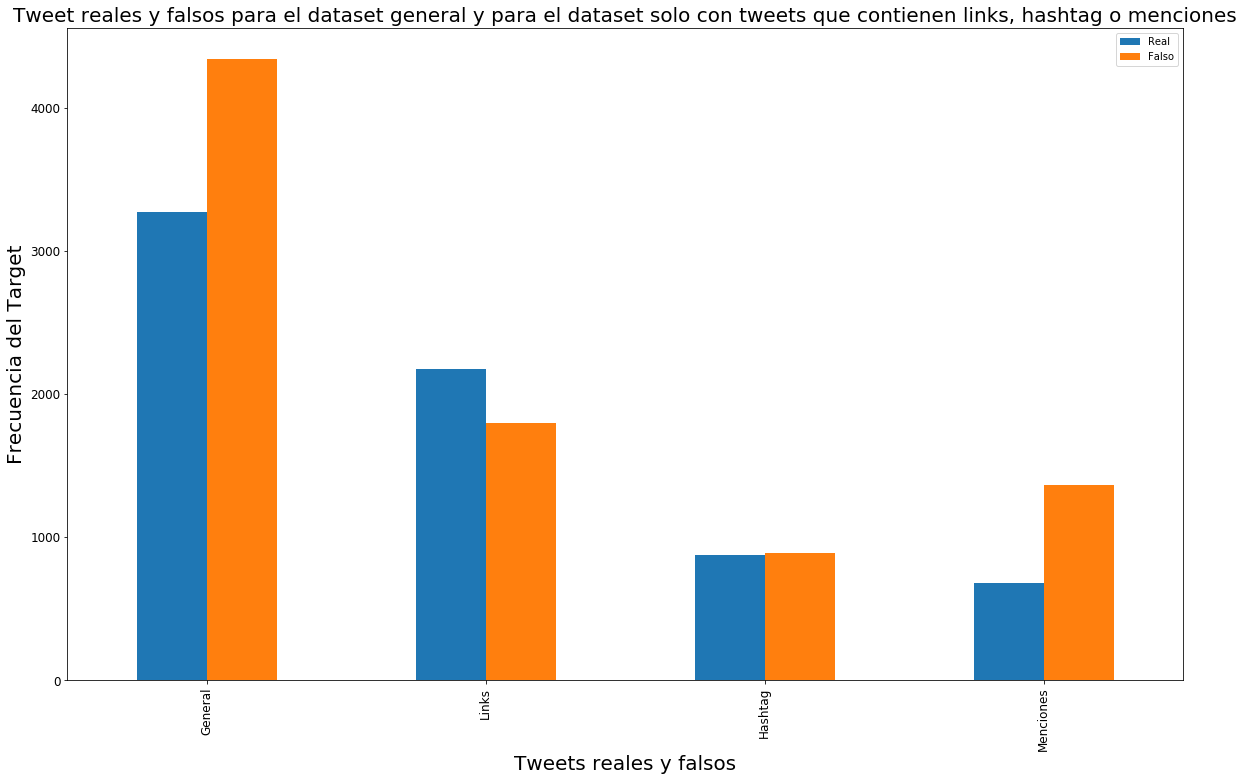

In [117]:
plot_index = ['General', 'Links', 'Hashtag', 'Menciones']
plot_data_true = [ true_tweets, true_link_tweets, true_hashtag_tweets, true_mentions_tweets ]
plot_data_false = [ false_tweets, false_link_tweets, false_hashtag_tweets, false_mentions_tweets ]
plot_data = { 'Real' : plot_data_true, 'Falso' : plot_data_false }
plot_dataframe = pd.DataFrame(plot_data, index=plot_index)
plot = plot_dataframe.plot(kind='bar',\
                           fontsize=12,\
                           linewidth=2,\
                           figsize=(20,12),\
                           stacked=False)
plot.set_title('Tweet reales y falsos para el dataset general y para el dataset solo con tweets que contienen links, hashtag o menciones', fontsize=20)
plot.set_xlabel("Tweets reales y falsos", fontsize=20)
plot.set_ylabel("Frecuencia del Target", fontsize=20)

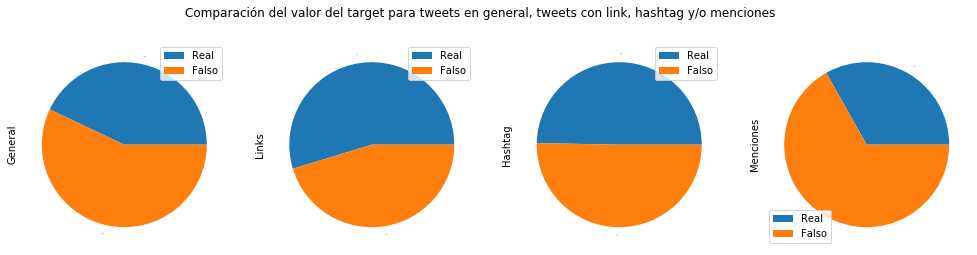

In [157]:
plot_data_general = [ true_tweets, false_tweets ]
plot_data_links = [ true_link_tweets, false_link_tweets ]
plot_data_hashtag = [ true_hashtag_tweets, false_hashtag_tweets ]
plot_data_mentions = [ true_mentions_tweets, false_mentions_tweets ]
plot_data_index = [ 'Real', 'Falso' ]
plot_data = { 'General' : plot_data_general, 'Links' : plot_data_links, 'Hashtag' : plot_data_hashtag, 'Menciones' : plot_data_mentions }
plot_dataframe = pd.DataFrame(plot_data, index=plot_data_index)
plot = plot_dataframe.plot.pie(subplots=True,\
                               figsize=(17, 4), \
                               title='Comparación del valor del target para tweets en general, tweets con link, hashtag y/o menciones',\
                               fontsize=0)

En los gráficos se ve que para los tweets con link existen mayor cantidad de tweets que hacen referencia a tweets de desastre reales.\
Para los tweets con hashtags la proporción de tweets reales vs tweets falsos es casi de un 50/50, la cantidad de tweets falsos es ínfimamente superior a aquellos que refieren a desastres reales.\
En los tweets que tienen menciones la cantidad de tweets que no refieren a un desastre real duplican a los que si refieren a un desastre real.